In [62]:
## Major Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy 

## Other
import os, joblib, missingno

## sklearn -- Preprocessing & Tuning & Transformation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector

## sklearn -- metrics
from sklearn.metrics import mean_squared_error, r2_score

## sklearn -- Models
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor

## Xgboost
#from xgboost import XGBRegressor

In [63]:
df = pd.read_csv(r"C:\Users\Mariam\Downloads\multiple_linear_regression_dataset.csv")

df.head(20)


,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 608.0 bytes


In [65]:
df.describe()

,age,experience,income
count,20.000000,20.000000,20.000000
mean,39.650000,6.200000,40735.500000
std,10.027725,4.124382,8439.797625
min,23.000000,1.000000,27840.000000
25%,31.500000,3.750000,35452.500000
50%,40.000000,5.000000,40190.000000
75%,47.000000,9.000000,45390.000000
max,58.000000,17.000000,63600.000000


In [66]:
df.isnull().sum()

age           0
experience    0
income        0
dtype: int64

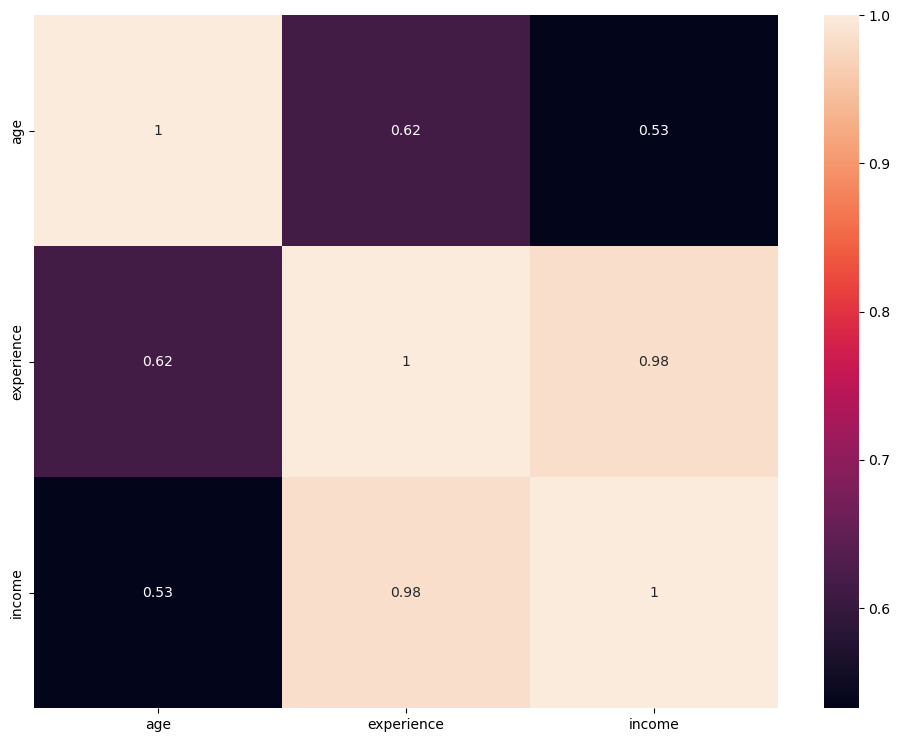

In [67]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

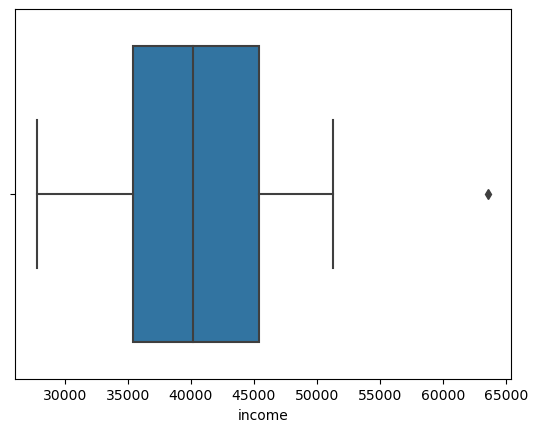

In [68]:
sns.boxplot(x=df['income'])
plt.show()

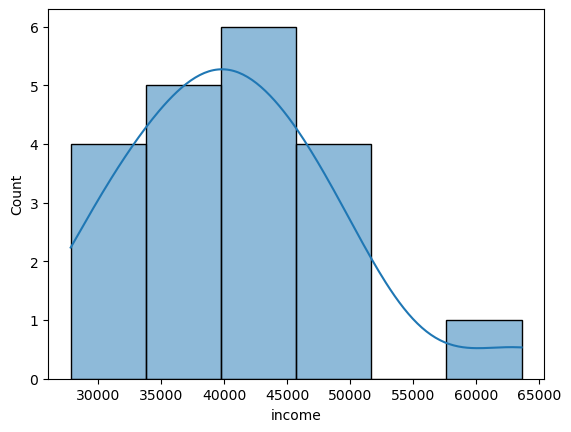

In [69]:
# Example: Check the distribution of a specific column
import seaborn as sns
sns.histplot(df['income'], kde=True)
plt.show()


Training set:
Mean Squared Error: 1763790.7152945308
R-squared: 0.9800348998104274

Test set:
Mean Squared Error: 1181227.1542541266
R-squared: 0.9596075813087839


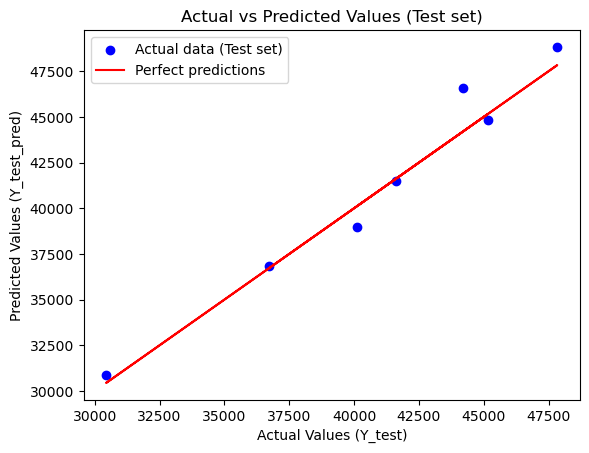

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your DataFrame
X = df[['age', 'experience']]  # Use double square brackets to select multiple columns
y = df.income

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=2)

# Initializing the Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, Y_train)

# Making predictions on both the training and test sets
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Evaluating the model on both sets
mse_train = mean_squared_error(Y_train, Y_train_pred)
r2_train = r2_score(Y_train, Y_train_pred)
mse_test = mean_squared_error(Y_test, Y_test_pred)
r2_test = r2_score(Y_test, Y_test_pred)

print("Training set:")
print(f"Mean Squared Error: {mse_train}")
print(f"R-squared: {r2_train}")

print("\nTest set:")
print(f"Mean Squared Error: {mse_test}")
print(f"R-squared: {r2_test}")

# You can also visualize the predictions against the actual values
plt.scatter(Y_test, Y_test_pred, color='blue', label='Actual data (Test set)')
plt.plot(Y_test, Y_test, color='red', label='Perfect predictions')  # Adding a line for perfect predictions
plt.xlabel("Actual Values (Y_test)")
plt.ylabel("Predicted Values (Y_test_pred)")
plt.title("Actual vs Predicted Values (Test set)")
plt.legend()
plt.show()


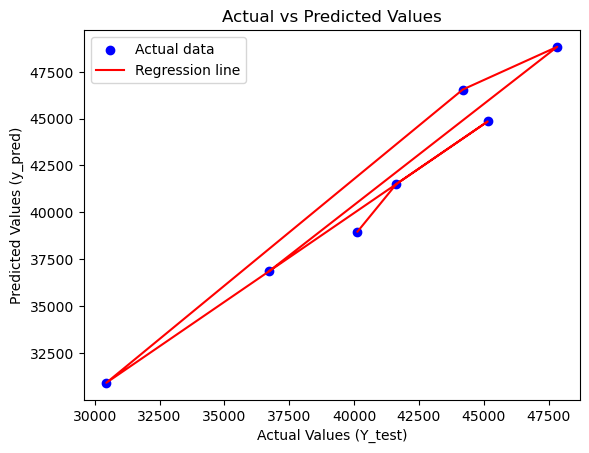

In [71]:
import matplotlib.pyplot as plt

# Assuming y_pred has been computed using clf.predict(X_test)

plt.scatter(Y_test, Y_test_pred, color='blue', label='Actual data')
plt.plot(Y_test, Y_test_pred, color='red', label='Regression line')  # Fixing the typo here
plt.xlabel("Actual Values (Y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()
